# importing libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# Read the dataset

In [44]:

data = pd.read_csv(r"C:\Users\abish\Downloads\natural_gas_price.csv")
data

,Date,Price
0,07-01-1997,3.82
1,08-01-1997,3.80
2,09-01-1997,3.61
3,10-01-1997,3.92
4,13-01-1997,4.00
...,...,...
5933,05-08-2020,2.23
5934,06-08-2020,2.26
5935,07-08-2020,2.15
5936,10-08-2020,2.18


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data.drop('Date', axis=1, inplace=True)

# Handle NULL values

In [32]:
data['Price'].fillna(data['Price'].median(), inplace=True)

# Remove outliers


In [33]:
z = np.abs(stats.zscore(data))
threshold = 3
df_no_outliers = data[(z <= threshold).all(axis=1)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


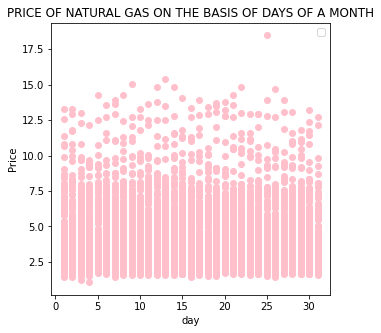

In [47]:
fig=plt.figure(figsize=(5,5))
plt.scatter(data['day'],data['Price'],color='pink')
plt.xlabel('day')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


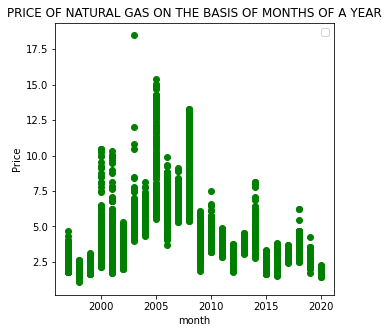

In [48]:
fig=plt.figure(figsize=(5,5))
plt.scatter(data['year'],data['Price'],color='green')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

<AxesSubplot:>

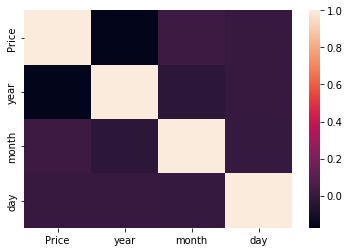

In [49]:
sns.heatmap(data.corr())


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


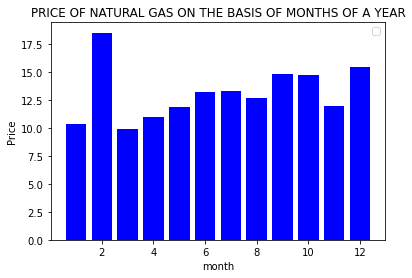

In [50]:
plt.bar(data['month'],data['Price'],color='blue')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

<AxesSubplot:xlabel='year', ylabel='Price'>

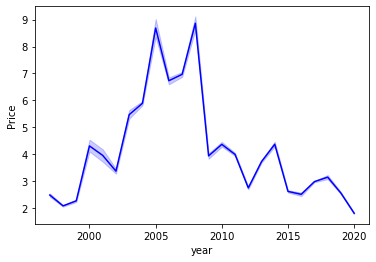

In [51]:
sns.lineplot(x='year',y='Price',data=data,color='blue')


<AxesSubplot:xlabel='month', ylabel='Price'>

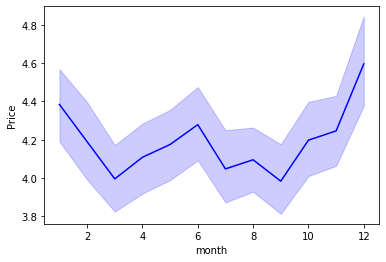

In [52]:
sns.lineplot(x='month',y='Price',data=data,color='blue')


<AxesSubplot:xlabel='day', ylabel='Price'>

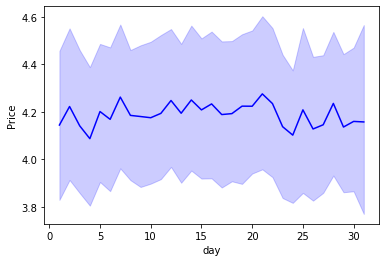

In [53]:
sns.lineplot(x='day',y='Price',data=data,color='blue')


<AxesSubplot:>

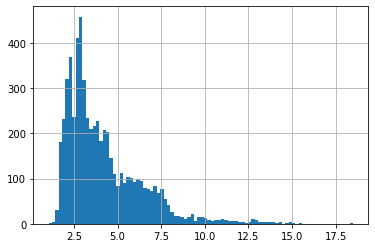

In [54]:
data['Price'].hist(bins=90)


<AxesSubplot:title={'center':'Price'}, xlabel='month'>

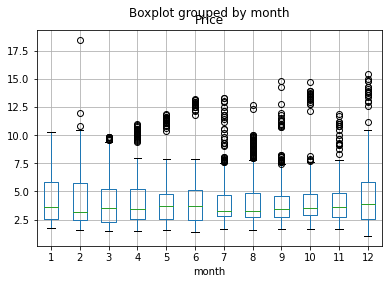

In [55]:
data.boxplot(column='Price',by='month')


In [34]:

# Separate Dependent and Independent Variables
x = df_no_outliers[['year', 'month', 'day']].values
y = df_no_outliers['Price'].values


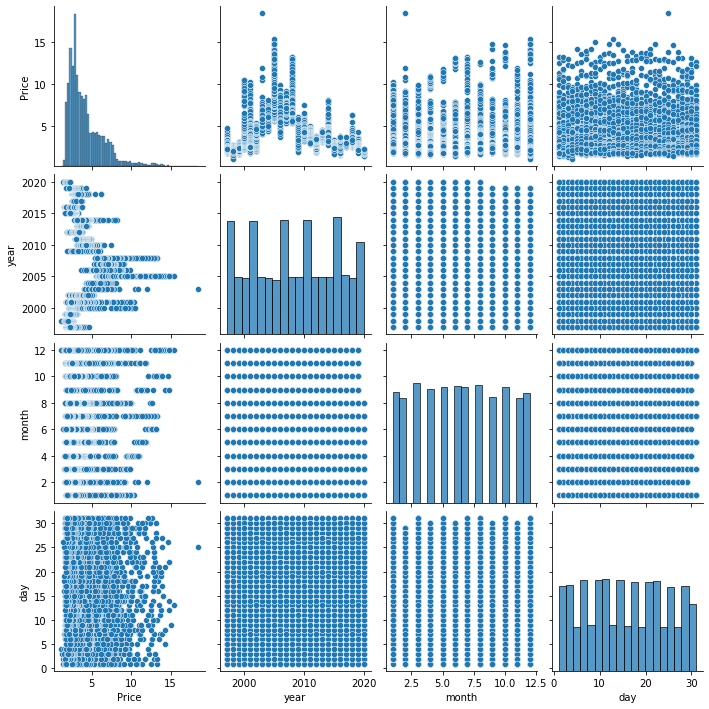

In [56]:
sns.pairplot(data)
plt.show()


# Standardize features


In [35]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Train and Test Split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Model Building - Decision Tree Regressor

In [37]:
param_grid = {
    'criterion': ['squared_error', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 11),
    'min_samples_split': range(10, 60, 10)
}
dt_grid = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
dt_grid.fit(x_train, y_train)
best_params = dt_grid.best_params_

dt_model = DecisionTreeRegressor(**best_params)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
y_pred_dt


array([3.60388889, 1.58      , 3.43761905, ..., 2.21      , 2.92857143,
       4.12285714])

# Model Building - Random Forest Regressor

In [38]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_rf

array([3.4107, 1.5842, 3.2023, ..., 2.2489, 2.894 , 4.1414])

# Model Evaluation

In [58]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Evaluation:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")

# Evaluate Decision Tree Regressor


In [59]:
evaluate_model(y_test, y_pred_dt, "Decision Tree Regressor")

Decision Tree Regressor Evaluation:
Mean Absolute Error: 0.20
Mean Squared Error: 0.12
Root Mean Squared Error: 0.34
R-squared: 0.97


# Evaluate Random Forest Regressor


In [60]:
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

Random Forest Regressor Evaluation:
Mean Absolute Error: 0.12
Mean Squared Error: 0.04
Root Mean Squared Error: 0.21
R-squared: 0.99


# Save models

In [62]:
joblib.dump(dt_model, r"C:\Users\abish\OneDrive\Documents\Project\decision_tree_model.joblib")

['C:\\Users\\abish\\OneDrive\\Documents\\Project\\decision_tree_model.joblib']

In [63]:
joblib.dump(rf_model, r"C:\Users\abish\OneDrive\Documents\Project\random_forest_model.joblib")

['C:\\Users\\abish\\OneDrive\\Documents\\Project\\random_forest_model.joblib']